<a href="https://colab.research.google.com/github/Gudrum/Modelo_Automatico/blob/main/Modelo_Automatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

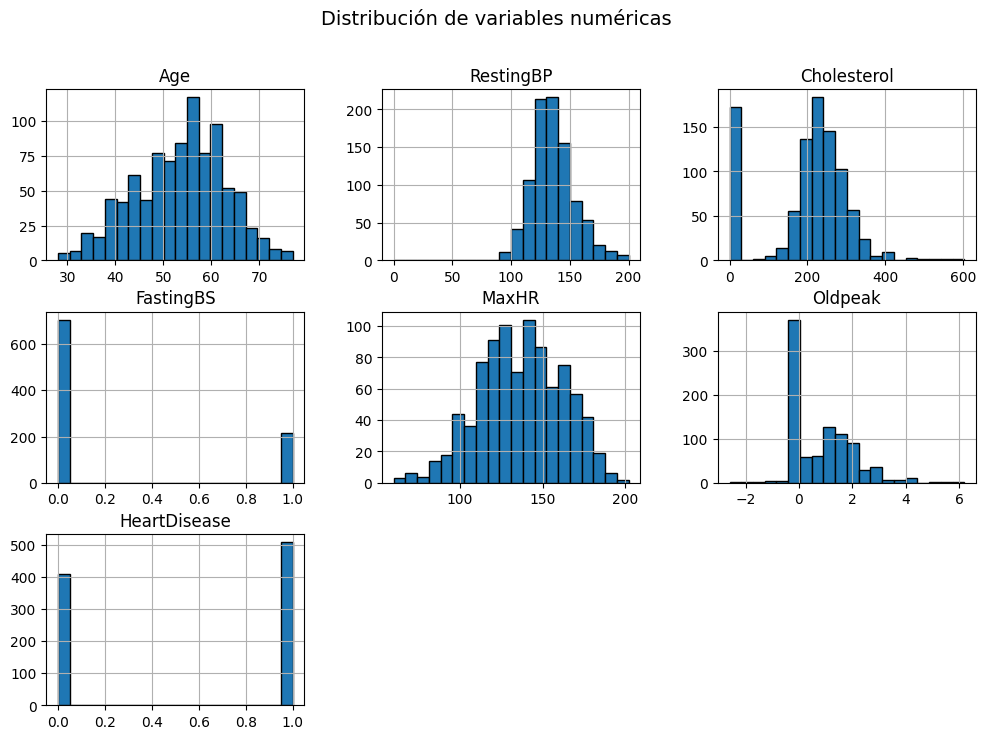

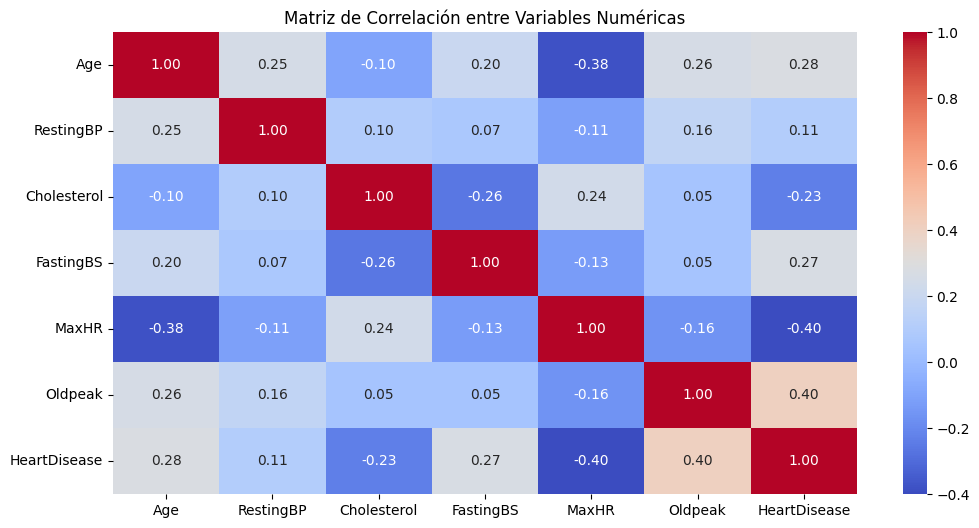

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.4033 - loss: 0.7611 - val_accuracy: 0.5870 - val_loss: 0.6915
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6743 - loss: 0.6571 - val_accuracy: 0.7337 - val_loss: 0.6015
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7668 - loss: 0.5833 - val_accuracy: 0.8261 - val_loss: 0.5078
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8182 - loss: 0.4946 - val_accuracy: 0.8370 - val_loss: 0.4338
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8201 - loss: 0.4510 - val_accuracy: 0.8478 - val_loss: 0.3958
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8250 - loss: 0.3957 - val_accuracy: 0.8478 - val_loss: 0.3794
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8416 - loss: 0.3712 - val_accuracy: 0.8370 - val_loss: 0.3722
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8493 - loss: 0.3531 - val_accuracy: 0.8261 - val_loss: 0.3687
Ep

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Cargar el conjunto de datos
df = pd.read_csv("heart.csv")

# Análisis Exploratorio de Datos (EDA)
print(df.info())
print(df.describe())

# Visualización de la distribución de variables numéricas
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Distribución de variables numéricas', fontsize=14)
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Preprocesamiento de Datos
# Reemplazo de valores 0 en Cholesterol y RestingBP con la mediana
df.loc[df['RestingBP'] == 0, 'RestingBP'] = df['RestingBP'].median()
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = df['Cholesterol'].median()

# Codificación de variables categóricas
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separar características y variable objetivo
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo Back-Propagation
model_bp = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilación y entrenamiento
model_bp.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_bp = model_bp.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluación del modelo
loss_bp, accuracy_bp = model_bp.evaluate(X_test_scaled, y_test)
print(f"Back-Propagation Model - Loss: {loss_bp}, accuracy: {accuracy_bp}")
